<a href="https://colab.research.google.com/github/rerebebeccacca/20210723_food_identify_project/blob/main/010_%E8%B3%87%E6%96%99%E6%B8%85%E6%B4%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
開始前，必須先去下載 GCP 為我們搜集的Log
並把名字改為 downloaded-logs.csv
上傳到colab

'''

'\n開始前，必須先去下載 GCP 為我們搜集的Log\n並把名字改為 downloaded-logs.csv\n上傳到colab\n\n'

In [ ]:
'''
讀取csv

python read csv
https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/
'''
import pandas as pd 
data = pd.read_csv("downloaded-logs.csv") 
data

,httpRequest.protocol,httpRequest.requestMethod,httpRequest.requestUrl,httpRequest.userAgent,insertId,jsonPayload.message,jsonPayload.python_logger,logName,receiveTimestamp,resource.labels.project_id,resource.type,severity,sourceLocation.file,sourceLocation.function,sourceLocation.line,spanId,timestamp,trace
0,HTTP/1.1,POST,http://project-dietdiary-mf4j6r5bea-df.a.run.a...,LineBotWebhook/2.0,vd665gg103xlqg,"{""destination"":""Uce979b9786733f30f88ad4eb1d9e8...",diary_bot_event,projects/project-dietdiary/logs/diary_bot_event,2021-08-05T13:21:58.791353662Z,project-dietdiary,global,INFO,/app/app.py,callback,68,16619700245480124171,2021-08-05T13:21:58.748978Z,projects/project-dietdiary/traces/ff04d517e2e1...
1,HTTP/1.1,POST,http://project-dietdiary-mf4j6r5bea-df.a.run.a...,LineBotWebhook/2.0,1y7j2d4fwls056,"{""destination"":""Uce979b9786733f30f88ad4eb1d9e8...",diary_bot_event,projects/project-dietdiary/logs/diary_bot_event,2021-08-05T13:21:45.877542877Z,project-dietdiary,global,INFO,/app/app.py,callback,68,7571983385242370551,2021-08-05T13:21:45.839558Z,projects/project-dietdiary/traces/61e2268e9f7d...
2,HTTP/1.1,POST,http://project-dietdiary-mf4j6r5bea-df.a.run.a...,LineBotWebhook/2.0,1ha517jfucqria,"{""destination"":""Uce979b9786733f30f88ad4eb1d9e8...",diary_bot_event,projects/project-dietdiary/logs/diary_bot_event,2021-08-05T13:21:25.077484533Z,project-dietdiary,global,INFO,/app/app.py,callback,68,7531596867258831946,2021-08-05T13:21:25.042145Z,projects/project-dietdiary/traces/dc94d0d524c8...
3,HTTP/1.1,POST,http://project-dietdiary-mf4j6r5bea-df.a.run.a...,LineBotWebhook/2.0,hher7hfty8ef2,"{""destination"":""Uce979b9786733f30f88ad4eb1d9e8...",diary_bot_event,projects/project-dietdiary/logs/diary_bot_event,2021-08-05T13:20:56.020351194Z,project-dietdiary,global,INFO,/app/app.py,callback,68,9404961790358895502,2021-08-05T13:20:55.977435Z,projects/project-dietdiary/traces/b4ee80dbaf46...
4,HTTP/1.1,POST,http://project-dietdiary-mf4j6r5bea-df.a.run.a...,LineBotWebhook/2.0,m7f1b0f1wisy9,"{""destination"":""Uce979b9786733f30f88ad4eb1d9e8...",diary_bot_event,projects/project-dietdiary/logs/diary_bot_event,2021-08-05T13:18:21.978866990Z,project-dietdiary,global,INFO,/app/app.py,callback,68,1795483224548951952,2021-08-05T13:18:21.930545Z,projects/project-dietdiary/traces/ebc3fba65082...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526,HTTP/1.1,POST,http://6308a75fd6d0.ap.ngrok.io/callback,LineBotWebhook/2.0,d1mxs4g446mv4f,"{""destination"":""Uce979b9786733f30f88ad4eb1d9e8...",diary_bot_event,projects/project-dietdiary/logs/diary_bot_event,2021-08-01T13:57:00.687383819Z,project-dietdiary,global,INFO,/home/ryanjrwk/cloudshell_open/dietdiary/app.py,callback,63,,2021-08-01T13:57:00.655329Z,NaN
4527,HTTP/1.1,POST,http://6308a75fd6d0.ap.ngrok.io/callback,LineBotWebhook/2.0,1cu45wsg4cktzjw,"{""destination"":""Uce979b9786733f30f88ad4eb1d9e8...",diary_bot_event,projects/project-dietdiary/logs/diary_bot_event,2021-08-01T13:54:04.321504194Z,project-dietdiary,global,INFO,/home/ryanjrwk/cloudshell_open/dietdiary/app.py,callback,63,,2021-08-01T13:54:04.302100Z,NaN
4528,HTTP/1.1,POST,http://6308a75fd6d0.ap.ngrok.io/callback,LineBotWebhook/2.0,9fnhj2g4fbt2t9,"{""destination"":""Uce979b9786733f30f88ad4eb1d9e8...",diary_bot_event,projects/project-dietdiary/logs/diary_bot_event,2021-08-01T13:54:04.161722712Z,project-dietdiary,global,INFO,/home/ryanjrwk/cloudshell_open/dietdiary/app.py,callback,63,,2021-08-01T13:54:04.085572Z,NaN
4529,HTTP/1.1,POST,http://6308a75fd6d0.ap.ngrok.io/callback,LineBotWebhook/2.0,ivdbt2fijia21,"{""destination"":""Uce979b9786733f30f88ad4eb1d9e8...",diary_bot_event,projects/project-dietdiary/logs/diary_bot_event,2021-08-01T13:51:44.103795607Z,project-dietdiary,global,INFO,/home/ryanjrwk/cloudshell_open/dietdiary/app.py,callback,63,,2021-08-01T13:51:44.072885Z,NaN


In [ ]:
'''
抓出指定欄位 - jsonPayload.message

'''
a = data['jsonPayload.message']

In [ ]:
print(a[10])

{"destination":"Uce979b9786733f30f88ad4eb1d9e8125","events":[{"type":"message","message":{"type":"text","id":"14520261427296","text":"我要記錄!"},"timestamp":1628166039370,"source":{"type":"user","userId":"U58c0913d3e35ac88266cc5df67bccc6d"},"replyToken":"6f538f5bab5c421c9de25d48651f24a1","mode":"active"}]}


In [ ]:
'''
將jsonPayload.message 的欄位內容 轉成csv

欄位若無值，則不填

'''
import json
json_data_list = []


df_message = pd.DataFrame(columns=['userId', 'timestamp', 'event_type','message_type','message_id', 'message_text'])

for row in  data['jsonPayload.message']:
  try:
    events = json.loads(row).get('events')[0]
    print(json.loads(row).get('events')[0])
    # json_data_list.append()
    # print(line_event.get('type'))
    # print(line_event.get('message'))
    # print(line_event.get('message').get('id'))
    # print(line_event.get('timestamp'))
    # print(line_event.get('source').get('userId'))
    if events.get('type') not in ['follow','unfollow','postback']:
      df_message = df_message.append(
          {
            'userId': events.get('source').get('userId'), 
            'timestamp': events.get('timestamp'), 
            'event_type': events.get('type'),
            'message_type': events.get('message').get('type'),
            'message_id': events.get('message').get('id'),
            'message_text': events.get('message').get('text')
          },
          ignore_index=True)
    elif events.get('type')  in ['postback']:
      df_message =df_message.append(
          {
            'userId': events.get('source').get('userId'), 
            'timestamp': events.get('timestamp'), 
            'event_type': events.get('type'),
            'message_text': events.get('postback').get('data')
          },
          ignore_index=True
      )
    else:
      df_message = df_message.append(
          {
            'userId': events.get('source').get('userId'), 
            'timestamp': events.get('timestamp'), 
            'event_type': events.get('type')
          },
          ignore_index=True)
  except:
    pass

df_message

{'type': 'message', 'message': {'type': 'text', 'id': '14520610952799', 'text': '活動量?'}, 'timestamp': 1628169718004, 'source': {'type': 'user', 'userId': 'U92ed6326d9715bd4e85c0755c81c8b98'}, 'replyToken': '230c86b898684614947aaa911e8165f2', 'mode': 'active'}
{'type': 'message', 'message': {'type': 'text', 'id': '14520609757041', 'text': '男/34/173/73'}, 'timestamp': 1628169705129, 'source': {'type': 'user', 'userId': 'U92ed6326d9715bd4e85c0755c81c8b98'}, 'replyToken': '5e86fe147bde4fc9bec60c9a05582142', 'mode': 'active'}
{'type': 'message', 'message': {'type': 'text', 'id': '14520607858899', 'text': 'L'}, 'timestamp': 1628169684562, 'source': {'type': 'user', 'userId': 'U92ed6326d9715bd4e85c0755c81c8b98'}, 'replyToken': '412e25aa38004038a5eede12d02cd266', 'mode': 'active'}
{'type': 'follow', 'timestamp': 1628169655364, 'source': {'type': 'user', 'userId': 'U87f4abcda54d02a56938cdc2a97d6079'}, 'replyToken': 'efdafa5cf19a473ebc57ba8b38d3d22b', 'mode': 'active'}
{'type': 'message', 'messa

,userId,timestamp,event_type,message_type,message_id,message_text
0,U92ed6326d9715bd4e85c0755c81c8b98,1628169718004,message,text,14520610952799,活動量?
1,U92ed6326d9715bd4e85c0755c81c8b98,1628169705129,message,text,14520609757041,男/34/173/73
2,U92ed6326d9715bd4e85c0755c81c8b98,1628169684562,message,text,14520607858899,L
3,U87f4abcda54d02a56938cdc2a97d6079,1628169655364,follow,NaN,NaN,NaN
4,U905e11111cd2f77511ea3255dd14cf70,1628169501569,message,text,14520591049699,@炸雞
...,...,...,...,...,...,...
4524,U69b5bef808bc39b5bb76b7d5e17b7a82,1627826219978,message,text,14497143223648,我要記錄!
4525,U69b5bef808bc39b5bb76b7d5e17b7a82,1627826044093,follow,NaN,NaN,NaN
4526,U69b5bef808bc39b5bb76b7d5e17b7a82,1627826043593,unfollow,NaN,NaN,NaN
4527,U69b5bef808bc39b5bb76b7d5e17b7a82,1627825903417,follow,NaN,NaN,NaN


In [ ]:
# 安裝line 套件
!pip install line-bot-sdk

     |████████████████████████████████| 68 kB 4.8 MB/s 


In [ ]:
'''

設置Line Bot Api 的 Channel access token

'''

from linebot import (
    LineBotApi, WebhookHandler
)

line_bot_api = LineBotApi('iRuogYf3cHsttNKwqUwl0phQV4fNuhmRPyVenE5DB5ArJHSLH/jYuJr31y7+DgGWRZJUSzr5i8NsvbKUcy7Xb9Akxys5GWdqm2bRcsbr/s03t4mpBO9UDnGcQG+BYHsxBFC6y36okKYWUg1qakCVSwdB04t89/1O/w1cDnyilFU=')

In [ ]:
'''
取出用戶id，向Line要個資
整理成一份用戶個資名單
'''


user_info_df= pd.DataFrame(columns=['userId', 'display_name', 'picture_url','status_message'])

for user_id in df_message['userId'].unique():
  try:
    line_user_profile = line_bot_api.get_profile(user_id)
    
    user_info_df = user_info_df.append(
        {
          'display_name': line_user_profile.display_name, 
          'userId': line_user_profile.user_id, 
          'picture_url': line_user_profile.picture_url,
          'status_message': line_user_profile.status_message
        },
        ignore_index=True)
  except:
    pass

user_info_df

,userId,display_name,picture_url,status_message
0,U92ed6326d9715bd4e85c0755c81c8b98,楊承翰,https://sprofile.line-scdn.net/0hHNbi9cpPF2FPE...,Introspection
1,U87f4abcda54d02a56938cdc2a97d6079,Krystal,https://sprofile.line-scdn.net/0hGfol1IZXGElCF...,"once the route chosen,u’ve to walk it through,..."
2,U905e11111cd2f77511ea3255dd14cf70,謹伃,https://sprofile.line-scdn.net/0hxCZy5d2qJ2x3A...,𖤐
3,U58c0913d3e35ac88266cc5df67bccc6d,Jeffrey 宇春,https://sprofile.line-scdn.net/0hzVNC_GtIJXljO...,None
4,U0a42fd7d39d4fb9788923c88d2d887a1,林庠達,https://sprofile.line-scdn.net/0h5MQffS4CamJ8H...,None
...,...,...,...,...
89,Uc9223900543f0043165b701030402a3b,smileFrost,https://sprofile.line-scdn.net/0h0sfU5hcib1xLL...,None
90,Ucaaa3173b2720f91815269c83678b5bb,Ruby,https://sprofile.line-scdn.net/0hz6xleseeJRlVF...,(zoning out)
91,U841524d97d8d2c9dfe350d71d5c6d6ee,Kurt Lee,https://sprofile.line-scdn.net/0hFhLOn6kLGUdhN...,time up.
92,U6572c2fbedec6740025a181462b909c7,Babym LIN,https://sprofile.line-scdn.net/0hzART8ZCTJW5_L...,None


In [ ]:
'''

將用戶個資名單跟 jsonPayload的欄位內容 整理在一份csv

'''
merge_data = pd.merge(df_message, user_info_df)
merge_data

,userId,timestamp,event_type,message_type,message_id,message_text,display_name,picture_url,status_message
0,U92ed6326d9715bd4e85c0755c81c8b98,1628169718004,message,text,14520610952799,活動量?,楊承翰,https://sprofile.line-scdn.net/0hHNbi9cpPF2FPE...,Introspection
1,U92ed6326d9715bd4e85c0755c81c8b98,1628169705129,message,text,14520609757041,男/34/173/73,楊承翰,https://sprofile.line-scdn.net/0hHNbi9cpPF2FPE...,Introspection
2,U92ed6326d9715bd4e85c0755c81c8b98,1628169684562,message,text,14520607858899,L,楊承翰,https://sprofile.line-scdn.net/0hHNbi9cpPF2FPE...,Introspection
3,U92ed6326d9715bd4e85c0755c81c8b98,1628065381568,message,text,14513096975264,2e32e32e3e32e,楊承翰,https://sprofile.line-scdn.net/0hHNbi9cpPF2FPE...,Introspection
4,U92ed6326d9715bd4e85c0755c81c8b98,1628065380148,message,text,14513096863336,wedewdewdwed21e,楊承翰,https://sprofile.line-scdn.net/0hHNbi9cpPF2FPE...,Introspection
...,...,...,...,...,...,...,...,...,...
4518,Ue9bcd3c1f253caab955272f3c7bbf86d,1627892905613,postback,NaN,NaN,nono,Chihyang Li,https://sprofile.line-scdn.net/0hbASgZAGHPW5-H...,None
4519,Ue9bcd3c1f253caab955272f3c7bbf86d,1627892888976,message,image,14501296790726,None,Chihyang Li,https://sprofile.line-scdn.net/0hbASgZAGHPW5-H...,None
4520,Ue9bcd3c1f253caab955272f3c7bbf86d,1627892880755,message,text,14501296144144,我要記錄!,Chihyang Li,https://sprofile.line-scdn.net/0hbASgZAGHPW5-H...,None
4521,Ue9bcd3c1f253caab955272f3c7bbf86d,1627892518645,message,image,14501265937224,None,Chihyang Li,https://sprofile.line-scdn.net/0hbASgZAGHPW5-H...,None


In [ ]:
'''
timestamp 轉換成人類可懂的時間
'''

import datetime
human_use_date=[]
for stamp in merge_data['timestamp']:
  
  timestamp = datetime.datetime.fromtimestamp(
      stamp/1000+8*3600
      )
  human_use_date.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
  

merge_data['human_date']=human_use_date
merge_data

,userId,timestamp,event_type,message_type,message_id,message_text,display_name,picture_url,status_message,human_date
0,U92ed6326d9715bd4e85c0755c81c8b98,1628169718004,message,text,14520610952799,活動量?,楊承翰,https://sprofile.line-scdn.net/0hHNbi9cpPF2FPE...,Introspection,2021-08-05 21:21:58
1,U92ed6326d9715bd4e85c0755c81c8b98,1628169705129,message,text,14520609757041,男/34/173/73,楊承翰,https://sprofile.line-scdn.net/0hHNbi9cpPF2FPE...,Introspection,2021-08-05 21:21:45
2,U92ed6326d9715bd4e85c0755c81c8b98,1628169684562,message,text,14520607858899,L,楊承翰,https://sprofile.line-scdn.net/0hHNbi9cpPF2FPE...,Introspection,2021-08-05 21:21:24
3,U92ed6326d9715bd4e85c0755c81c8b98,1628065381568,message,text,14513096975264,2e32e32e3e32e,楊承翰,https://sprofile.line-scdn.net/0hHNbi9cpPF2FPE...,Introspection,2021-08-04 16:23:01
4,U92ed6326d9715bd4e85c0755c81c8b98,1628065380148,message,text,14513096863336,wedewdewdwed21e,楊承翰,https://sprofile.line-scdn.net/0hHNbi9cpPF2FPE...,Introspection,2021-08-04 16:23:00
...,...,...,...,...,...,...,...,...,...,...
4518,Ue9bcd3c1f253caab955272f3c7bbf86d,1627892905613,postback,NaN,NaN,nono,Chihyang Li,https://sprofile.line-scdn.net/0hbASgZAGHPW5-H...,None,2021-08-02 16:28:25
4519,Ue9bcd3c1f253caab955272f3c7bbf86d,1627892888976,message,image,14501296790726,None,Chihyang Li,https://sprofile.line-scdn.net/0hbASgZAGHPW5-H...,None,2021-08-02 16:28:08
4520,Ue9bcd3c1f253caab955272f3c7bbf86d,1627892880755,message,text,14501296144144,我要記錄!,Chihyang Li,https://sprofile.line-scdn.net/0hbASgZAGHPW5-H...,None,2021-08-02 16:28:00
4521,Ue9bcd3c1f253caab955272f3c7bbf86d,1627892518645,message,image,14501265937224,None,Chihyang Li,https://sprofile.line-scdn.net/0hbASgZAGHPW5-H...,None,2021-08-02 16:21:58


In [ ]:
print(merge_data['message_text'])

0                  活動量?
1           男/34/173/73
2                     L
3         2e32e32e3e32e
4       wedewdewdwed21e
             ...       
4518               nono
4519               None
4520              我要記錄!
4521               None
4522              我要記錄!
Name: message_text, Length: 4523, dtype: object


In [ ]:
b = merge_data['message_text']
text = list(b)
text

TypeError: ignored

In [ ]:
'''
將資料存成csv
'''
merge_data.to_csv("final_data.csv")

In [ ]:
'''

進行可視化

外國人不考慮中文，中文會是亂碼

'''



'\n\n進行可視化\n\n外國人不考慮中文，中文會是亂碼\n\n'

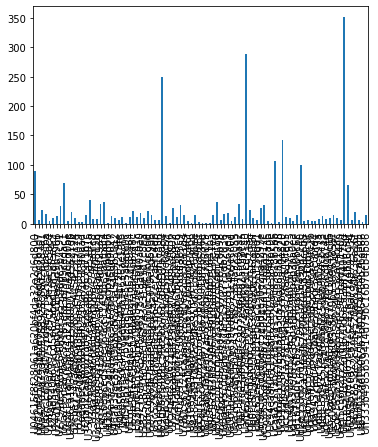

In [ ]:
'''
看看誰發的話多
'''

merge_data['userId'].value_counts().sort_index().plot.bar()
# merge_data['timestamp'].plot.hist()

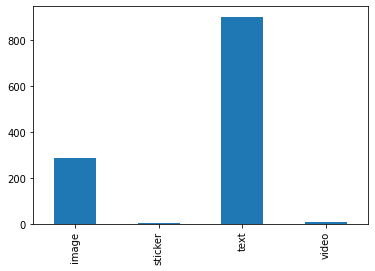

In [ ]:
'''
看看都發哪一類型的消息
'''
merge_data['message_type'].value_counts().sort_index().plot.bar()

In [3]:
import pandas as pd 
data2 = pd.read_csv("final_data.csv") 
data2["human_date"]

0       2021-08-05 21:21:58
1       2021-08-05 21:21:45
2       2021-08-05 21:21:24
3       2021-08-04 16:23:01
4       2021-08-04 16:23:00
               ...         
4518    2021-08-02 16:28:25
4519    2021-08-02 16:28:08
4520    2021-08-02 16:28:00
4521    2021-08-02 16:21:58
4522    2021-08-02 16:21:36
Name: human_date, Length: 4523, dtype: object

In [ ]:
data2

In [10]:
human_date = data2["human_date"]
human_date
print(type(human_date))

0       2021-08-05 21:21:58
1       2021-08-05 21:21:45
2       2021-08-05 21:21:24
3       2021-08-04 16:23:01
4       2021-08-04 16:23:00
               ...         
4518    2021-08-02 16:28:25
4519    2021-08-02 16:28:08
4520    2021-08-02 16:28:00
4521    2021-08-02 16:21:58
4522    2021-08-02 16:21:36
Name: human_date, Length: 4523, dtype: object
<class 'pandas.core.series.Series'>


In [ ]:
list = list(human_date)
list

['2021-08-05 21:21:58',
 '2021-08-05 21:21:45',
 '2021-08-05 21:21:24',
 '2021-08-04 16:23:01',
 '2021-08-04 16:23:00',
 '2021-08-04 16:22:42',
 '2021-08-04 16:22:22',
 '2021-08-05 21:20:55',
 '2021-08-05 21:18:21',
 '2021-08-05 21:18:12',
 '2021-08-05 21:18:08',
 '2021-08-05 21:17:32',
 '2021-08-05 21:17:02',
 '2021-08-05 10:33:27',
 '2021-08-05 10:33:13',
 '2021-08-05 10:33:11',
 '2021-08-05 10:33:01',
 '2021-08-05 10:31:41',
 '2021-08-05 10:31:25',
 '2021-08-05 01:11:35',
 '2021-08-05 01:11:32',
 '2021-08-05 01:08:06',
 '2021-08-05 01:06:57',
 '2021-08-05 01:06:32',
 '2021-08-05 01:02:55',
 '2021-08-05 01:02:49',
 '2021-08-05 01:02:46',
 '2021-08-05 01:02:34',
 '2021-08-05 01:02:08',
 '2021-08-05 01:01:46',
 '2021-08-05 01:00:51',
 '2021-08-05 01:00:40',
 '2021-08-05 01:00:20',
 '2021-08-05 00:59:34',
 '2021-08-05 00:58:55',
 '2021-08-04 19:59:15',
 '2021-08-04 19:58:24',
 '2021-08-04 19:58:21',
 '2021-08-04 19:58:13',
 '2021-08-04 19:57:51',
 '2021-08-04 19:57:48',
 '2021-08-04 19:

In [ ]:
# date = 0
# a = []
# while date<31:
#   date=date+1
#   if date<10:
#     date=f"0{date}"
#   a.append(f"2021-08-{date}")
#   date = int(date)
# a

['2021-08-01',
 '2021-08-02',
 '2021-08-03',
 '2021-08-04',
 '2021-08-05',
 '2021-08-06',
 '2021-08-07',
 '2021-08-08',
 '2021-08-09',
 '2021-08-10',
 '2021-08-11',
 '2021-08-12',
 '2021-08-13',
 '2021-08-14',
 '2021-08-15',
 '2021-08-16',
 '2021-08-17',
 '2021-08-18',
 '2021-08-19',
 '2021-08-20',
 '2021-08-21',
 '2021-08-22',
 '2021-08-23',
 '2021-08-24',
 '2021-08-25',
 '2021-08-26',
 '2021-08-27',
 '2021-08-28',
 '2021-08-29',
 '2021-08-30',
 '2021-08-31']

In [12]:
for i in range(1,10):
  name = f'L{str(i)}'
  locals()[name] = []
  print(f'{name}={locals()[name]}')

L1=[]
L2=[]
L3=[]
L4=[]
L5=[]
L6=[]
L7=[]
L8=[]
L9=[]


In [ ]:
L2 = []
date = ["2021-08-02","2021-08-03","2021-08-04","2021-08-05"]
L3 = []
L4 = []
L5 = []
for i in list:
  if i[9] == '2':
    L2.append(i[:10])
  elif i[9] == '3':
    L3.append(i[:10])
  elif i[9] == '4':
    L4.append(i[:10])
  elif i[9] == '5':
    L5.append(i[:10])
  else:
    pass
print(L2)

a = len(L2)
b = len(L3)
c = len(L4)
d = len(L5)
print(a,b,c,d)
Plt_list = []
Plt_list.append(a)
Plt_list.append(b)
Plt_list.append(c)
Plt_list.append(d)
print(Plt_list)

['2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021-08-02', '2021

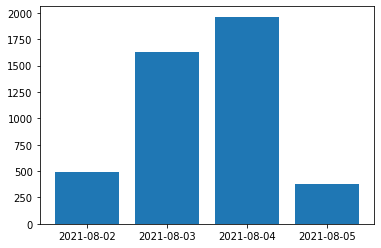

In [ ]:
#########每日消息量
import matplotlib.pyplot as plt
plt.bar(date, Plt_list) 
plt.savefig('用戶流失圖.jpg')
plt.show()


In [ ]:
text = pd.read_csv("final_data.csv") 
text = text["message_text"]+text["display_name"]
text
text_list = []
for i in text:
  text_list.append(i)
text_list
sex_list_man = []
sex_list_woman = []
sex_list_man_height = []
sex_list_woman_height = []

for i in text_list:
  i = str(i)
  try:
    if '男' in i:
      if 'Ryan'not in i and '劉穎多' not in i and 'Ruby' not in i and '巫旻龍' not in i and 'Kurt Lee' not in i:
        sex_list_man.append(int(i[9:11]))
        sex_list_man_height.append(int(i[5:8]))
    if '女' in i:
      if 'Ryan'not in i and '劉穎多' not in i and 'Ruby' not in i and '巫旻龍' not in i and 'Kurt Lee' not in i:
        
        sex_list_woman.append(int(i[9:11]))
        sex_list_woman_height.append(int(i[5:8]))
  except:
    pass
import statistics
print(sex_list_man)

for i in sex_list_man:
  i = str(i)
  try:
    if "Ryan" not in i:
      a.append(i)
  except:
    pass
mean_man = statistics.mean(sex_list_man)
mean_man_height = statistics.mean(sex_list_man_height)
mean_woman_height = statistics.mean(sex_list_woman_height)
print(f"男平均體重:{mean_man}")
print(f"女平均體重:{mean_woman}")
print(f"男平均身高:{mean_man_height}")
print(f"女平均身高:{mean_woman_height}")
print(f"人數男:{len(sex_list_man_height)}")
print(f"人數女:{len(sex_list_woman_height)}")
print(f"總人數:{len(sex_list_man_height)+len(sex_list_woman_height)}")
# sex_list_woman  
  

[73, 75, 74, 83, 60, 65, 65, 65, 60, 60, 60, 76, 76, 69, 64, 72, 63, 73, 67, 12, 61, 60, 73, 70, 70, 87, 87, 88]
男平均體重:68.14285714285714
女平均體重:52.42307692307692
男平均身高:172.39285714285714
女平均身高:159.6216216216216
人數男:28
人數女:37
總人數:65
